# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy import stats
from sklearn import metrics
import glob
import csv
import os
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
    
interesting_dir = "./Data/Fastest/"
interesting_labels = ['breaststroke', 'backstroke']
save_filename = "activity"

C:\Users\farha\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\farha\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\farha\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\farha\anaconda3\envs\tensorflow_gpu\l

Default GPU Device: /device:GPU:0


# Concate and label the raw data  

In [2]:
def data_concate_label(path,label):
    all_files1 = glob.glob(path + "/*.csv")
    
    li = []

    for filename in all_files1:
        df = pd.read_csv(filename, index_col=None, header=0)
        
        df['label'] = str(label)
            
        li.append(df)
        
    frame = pd.concat(li, axis=0, ignore_index=True)
#     frame = frame.drop_duplicates()
    
    if len(df.columns) == 19 :
        new_header =['DATE','TIME','ax','ay','az','gx','gy','gz','lx','ly','lz','mx','my','mz','ma','mg','ml','mm','label']
    
    else :
       
        new_header =['DATE','TIME','ax','ay','az','gx','gy','gz','ma','mg','label']

    frame = frame[500:]
    
    print(frame.shape)
    print(len(df.columns))
    frame.to_csv("./Data/Fastest/activity_"+str(label)+".csv",index = False,header=new_header)
    

In [3]:
path2 = r".\Data\Fastest\back"
label2 = "backstroke"
path1 = r".\Data\Fastest\breast"
label1 = "breaststroke"
# path3 = r".\Data\Fastest\rest"
# label3 = "rest"
data_concate_label(path1,label1)
data_concate_label(path2,label2)
# data_concate_label(path3,label3)

(15788, 11)
11
(14419, 11)
11


# Concate all data into one .csv file

In [4]:
import copy

df = pd.DataFrame()
for i in range(len(interesting_labels)):
#     df_tmp = pd.read_csv(interesting_dir+save_filename+"_"+str(i+1)+'.csv',parse_dates=[['DATE', ' TIME']],header = 0)
    df_tmp = pd.read_csv(interesting_dir+save_filename+"_"+interesting_labels[i]+'.csv',header = 0)
    df = pd.concat([df, df_tmp])
    
print(len(df.columns))
# df['ts'] = df[['DATE_TIME']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
# df = df.assign(DATE_TIME=df['ts'])
# if len(df.columns) == 19 :
drop_list = ['DATE','TIME','ma','mg']
# else :pass

# drop_list = ['DATE','TIME','ma','mg']
df = df.drop(drop_list, axis=1)
df = df.dropna()

# df.rename(columns = {'DATE_TIME':'ts'}, inplace = True) 
all_data_filename = "total.csv"
df.to_csv(interesting_dir+all_data_filename)

# df.reset_index(inplace = True) 
df

11


ax        ay         az        gx        gy        gz  \
0     -4.575938 -6.528134   0.681642 -0.641095 -0.233941 -3.383681   
1     -4.575938 -6.528134   0.681642 -0.768155 -0.043351 -3.433771   
2     -4.575938 -6.528134   0.681642 -0.818246  0.071492 -3.480197   
3     -4.575938 -6.528134   0.681642 -0.683856  0.125248 -3.532732   
4     -4.575938 -6.528134   0.681642 -0.328332  0.010405 -3.708661   
...         ...       ...        ...       ...       ...       ...   
14414 -0.462239  3.930227 -12.691209 -1.514945 -3.729942  0.602313   
14415 -0.462239  3.930227 -12.691209 -2.719571 -4.056144  0.383623   
14416  0.086221  3.341052 -13.273199 -2.719571 -4.056144  0.383623   
14417  0.086221  3.341052 -13.273199 -3.722611 -4.339585  0.161268   
14418  0.196392  1.034649 -14.822777 -3.722611 -4.339585  0.161268   

              label  
0      breaststroke  
1      breaststroke  
2      breaststroke  
3      breaststroke  
4      breaststroke  
...             ...  
14414    backstroke  
14415    backstroke  
14416    backstroke  
14417    backstroke  
14418    backstroke  

[30207 rows x 7 columns]

In [5]:
# normalize

# df[df.columns[:-1]] = df[df.columns[:-1]].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
# df

# Feature correlation (optional)

In [6]:
# use deepcopy to avoid other operation change value of df
df_cor = copy.deepcopy(df) 

features = df_cor.columns[0:-1]
df_cor["label"] = pd.factorize(df_cor.label)[0]
traindf = pd.DataFrame(df_cor,columns=features)
#print(df_cor["label"])
#print(traindf)

feature_name = list(traindf.columns)
print(feature_name)
y = df_cor['label']
X = traindf.copy()
X.isna().sum()
# X.dropna()
# X.fillna('mean')

['ax', 'ay', 'az', 'gx', 'gy', 'gz']


ax    0
ay    0
az    0
gx    0
gy    0
gz    0
dtype: int64

[0.13826656 0.20400985 0.19889453 0.13631709 0.14835368 0.1741583 ]


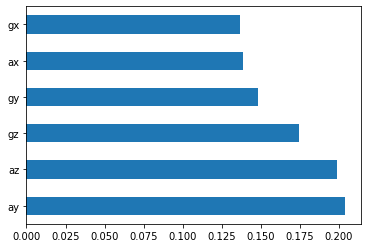

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

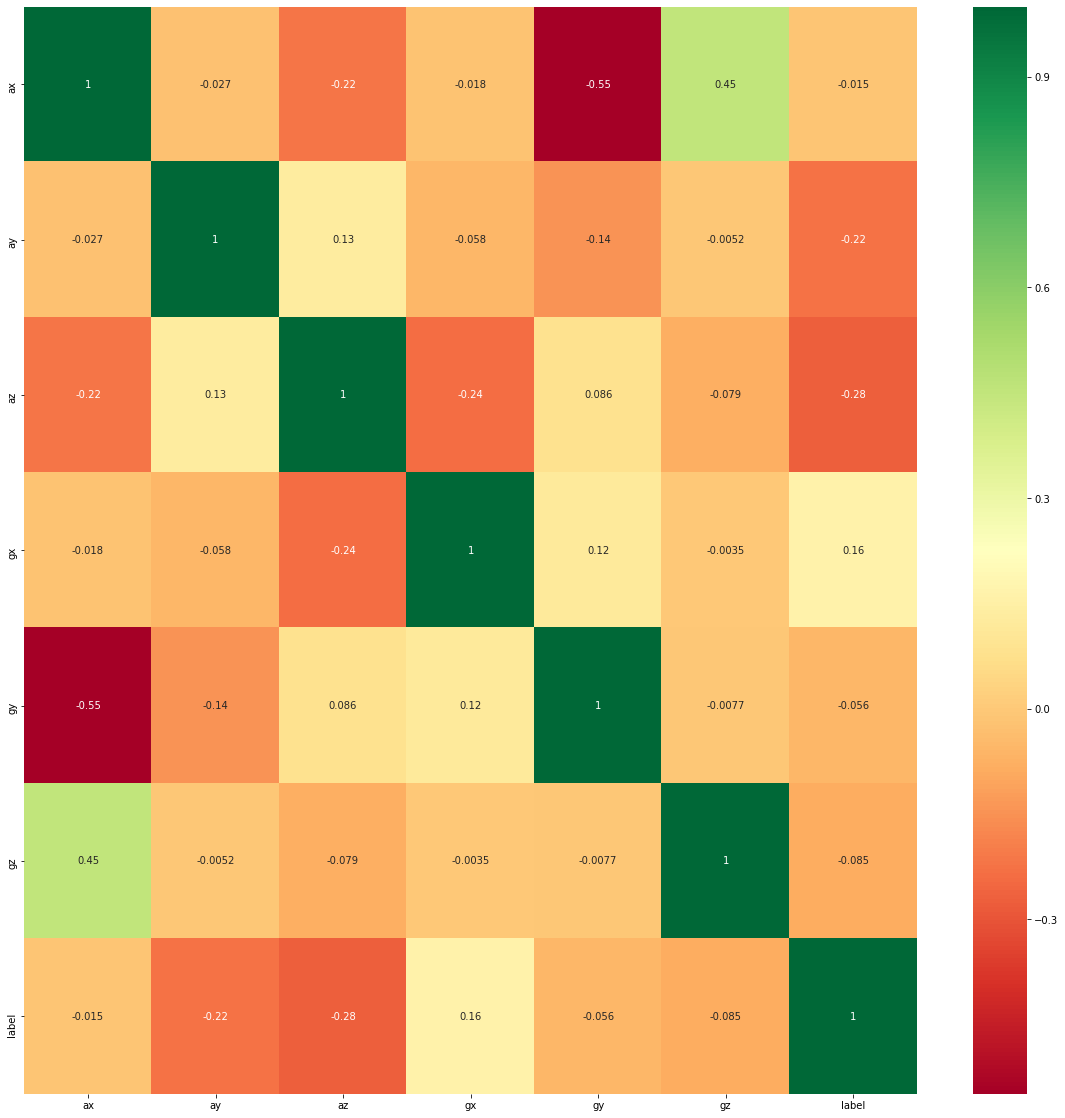

In [8]:
#get correlations of each features in dataset

corrmat = df_cor.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_cor[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
num_feats= len(feature_name)
X.columns.tolist()

['ax', 'ay', 'az', 'gx', 'gy', 'gz']

In [10]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
        
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
   
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]

    return cor_support, cor_feature, cor_list

cor_support, cor_feature, cor_list = cor_selector(X, y,num_feats)
cor_val=[abs(x) for x in cor_list]
cor_result = dict(zip(cor_feature, cor_val))
myDict = {key:val for key, val in cor_result.items() if val > 0}
{k: v for k, v in sorted(myDict.items(),reverse=True, key=lambda item: item[1])}

{'gz': 0.27519449491594866,
 'gy': 0.2246284253785566,
 'gx': 0.1647250304564047,
 'az': 0.08533173145864728,
 'ay': 0.05638534874676052,
 'ax': 0.015032649834064571}

In [11]:
df_plot = copy.deepcopy(df)
df_plot.reset_index(inplace = True) 


      index        ax        ay        az        gx        gy        gz  \
2000   2000 -2.882659  1.847250  8.132548  1.830465  1.267565  1.996819   
2001   2001 -2.882659  1.847250  8.132548  2.005172  1.549785  2.107996   
2002   2002 -2.882659  1.847250  8.132548  2.251962  1.799018  2.231391   
2003   2003 -2.882659  1.847250  8.132548  2.499973  2.001825  2.242386   
2004   2004 -2.882659  1.847250  8.132548  2.791966  2.178976  2.227726   
...     ...       ...       ...       ...       ...       ...       ...   
6495   6495  6.096270 -4.865990  6.899113 -2.242783  0.011627  2.683431   
6496   6496  5.818447 -4.940236  6.072832 -2.242783  0.011627  2.683431   
6497   6497  5.775337 -4.262445  5.802194 -2.242783  0.011627  2.683431   
6498   6498  6.254341 -4.140299  4.937592 -2.242783  0.011627  2.683431   
6499   6499  6.651914 -4.882755  4.223877 -2.242783  0.011627  2.683431   

             label  
2000  breaststroke  
2001  breaststroke  
2002  breaststroke  
2003  breaststr

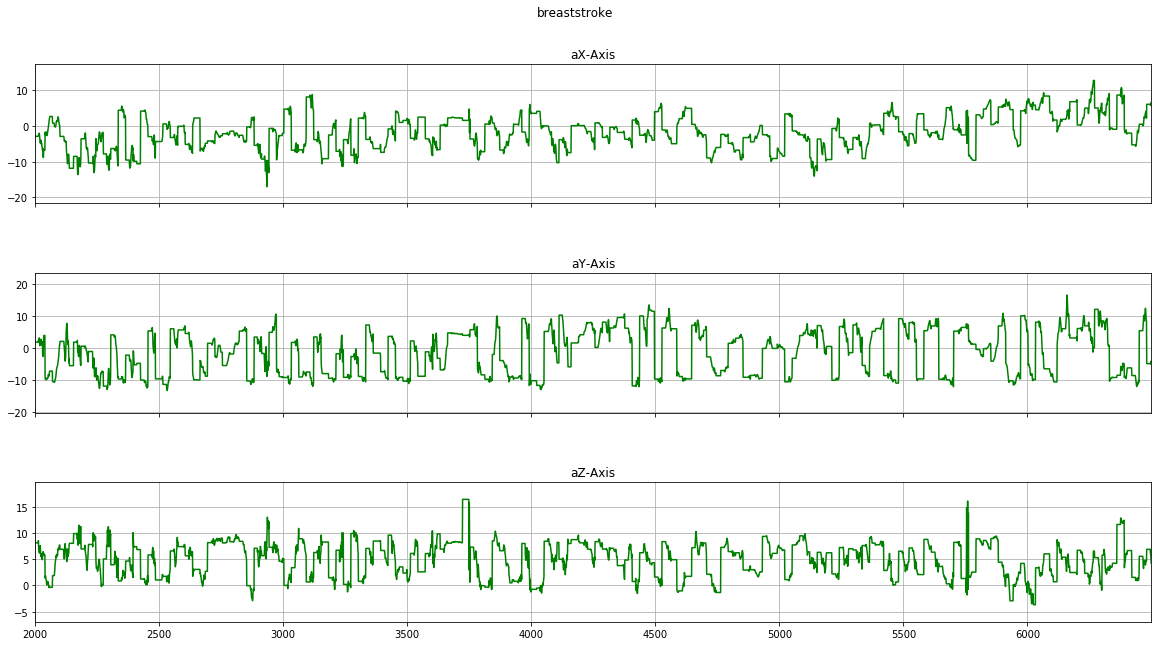

       index        ax        ay        az        gx        gy        gz  \
17788   2000  6.665339 -8.035291 -1.437012  0.663399 -0.891863  0.356745   
17789   2001  6.706055 -8.339458 -1.492097  0.663399 -0.891863  0.356745   
17790   2002  6.706055 -8.339458 -1.492097  0.632856 -0.751364  0.375071   
17791   2003  6.579119 -8.550221 -1.386716  0.632856 -0.751364  0.375071   
17792   2004  6.579119 -8.550221 -1.386716  0.708603 -0.612087  0.362854   
...      ...       ...       ...       ...       ...       ...       ...   
22283   6495 -2.105222 -9.723780 -3.350632 -0.614530  0.042761 -0.641408   
22284   6496 -2.105222 -9.723780 -3.350632 -0.259007  0.002443 -0.604756   
22285   6497 -1.719624 -9.932146 -3.513494 -0.259007  0.002443 -0.604756   
22286   6498 -1.719624 -9.932146 -3.513494  0.125838 -0.008552 -0.609643   
22287   6499 -1.408272 -9.912986 -3.532654  0.125838 -0.008552 -0.609643   

            label  
17788  backstroke  
17789  backstroke  
17790  backstroke  
17791  

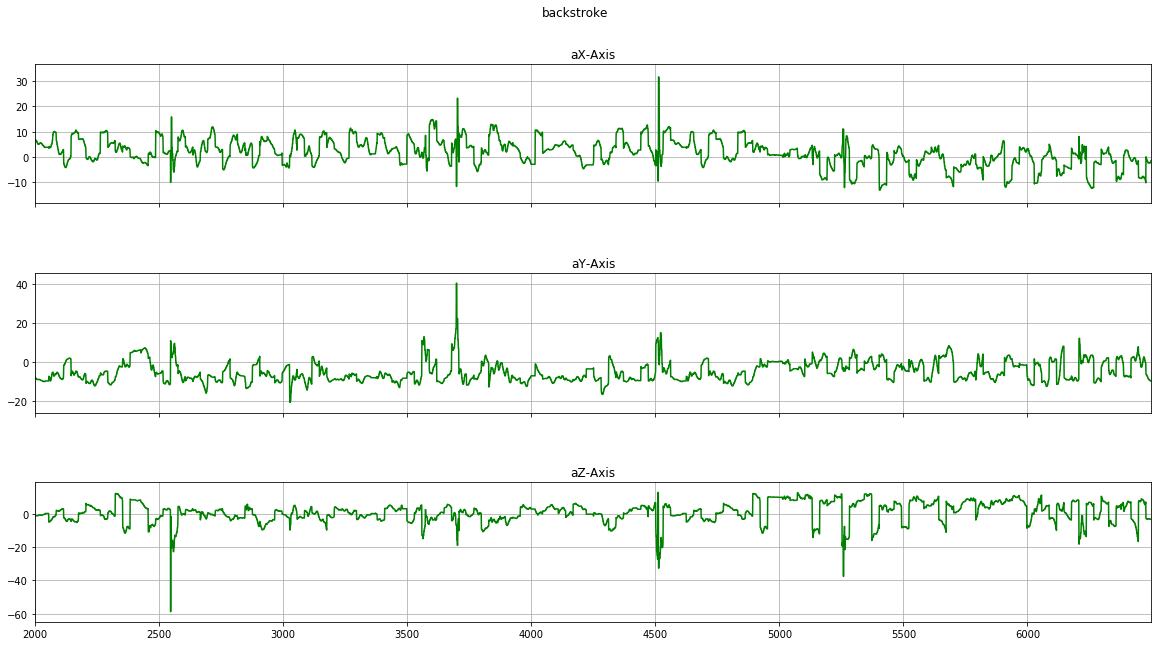

In [12]:
activities = df_plot['label'].value_counts().index
def plot_activity(activity, data):
    fig, ( ax1, ax2,ax3) = plt.subplots(nrows=3, figsize=(20, 10), sharex=True)
#     plot_axis(ax0, data['index'], data['gx'], 'Mag Accelero')
    plot_axis(ax1, data['index'], data['ax'], 'aX-Axis')
    plot_axis(ax2, data['index'], data['ay'], 'aY-Axis')
    plot_axis(ax3, data['index'], data['az'], 'aZ-Axis')
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
#     ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
Fs=200
for activity in activities:
    data_for_plot = df_plot[(df_plot['label'] == activity)][2000:6500]
    print(data_for_plot)
    print(activity)
    plot_activity(activity, data_for_plot)

# Split training and testing data

In [13]:
def train_test_split(label, ratio):
    split_point = int(len(df[df.label == label]) * ratio)
    return (df[df.label == label].iloc[:split_point, :], df[df.label == label].iloc[split_point:, :])

split_ratio = 0.75
train_data = pd.DataFrame([])
test_data = pd.DataFrame([])

for i in range(len(interesting_labels)):
    (train, test) = train_test_split(interesting_labels[i], split_ratio)
    train_data = pd.concat([train_data, train])
    test_data = pd.concat([test_data, test])

print("Number of train samples: ", len(train_data))
print("Number of test samples: ", len(test_data))


train_label = train_data['label'].to_frame()
test_label = test_data['label'].to_frame()

Number of train samples:  22655
Number of test samples:  7552


# Data Segmentation (Sliding Window)

In [14]:
N_TIME_STEPS = 240 #sliding window length
STEP = 40 #Sliding window step size
N_FEATURES = 6

def generate_sequence(x, y, n_time_steps, step):
    
    segments = []
    labels = []
    for i in range(0, len(x) - n_time_steps, step):
        ax = x['ax'].values[i: i + n_time_steps]
        ay = x['ay'].values[i: i + n_time_steps]
        az = x['az'].values[i: i + n_time_steps]

        gx = x['gx'].values[i: i + n_time_steps]
        gy = x['gy'].values[i: i + n_time_steps]
        gz = x['gz'].values[i: i + n_time_steps]
    
#         ma =  x['ma'].values[i: i + n_time_steps]
#         mg =  x['mg'].values[i: i + n_time_steps]
     
        label = stats.mode(y['label'][i: i + n_time_steps])[0][0]
#         segments.append([ax, ay, az, gx, gy, gz,ma,mg])
        segments.append([ax, ay, az, gx, gy, gz])
        labels.append(label)
        
    return segments, labels

train_X, train_y = generate_sequence(train_data, train_label, N_TIME_STEPS, STEP)
test_X, test_y = generate_sequence(test_data, test_label, N_TIME_STEPS, STEP)

In [15]:
# reshape input segments and one-hot encode labels
def reshape_segments(x, y, n_time_steps, n_features):
    
    x_reshaped = np.asarray(x, dtype= np.float32).reshape(-1, n_time_steps, n_features)
    y_reshaped = np.asarray(pd.get_dummies(y), dtype = np.float32)
    return x_reshaped, y_reshaped

X_train, y_train = reshape_segments(train_X, train_y, N_TIME_STEPS, N_FEATURES)
X_test, y_test = reshape_segments(test_X, test_y, N_TIME_STEPS, N_FEATURES)

In [16]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

# Import DL Library

In [17]:
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Bidirectional,SpatialDropout1D
from tensorflow.keras.layers import Attention
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras import optimizers
from keras import backend as K
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

N_CLASSES = 2
N_HIDDEN_UNITS = 32
L2 = 0.000001

Using TensorFlow backend.


# LSTM Model (Training) 

In [18]:
# LSTM model
from keras.backend import clear_session

clear_session()
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), 
         kernel_initializer='orthogonal', kernel_regularizer=l2(L2), recurrent_regularizer=l2(L2),
         bias_regularizer=l2(L2), name="LSTM_1"))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Flatten(name='Flatten'))
model.add(Dense(N_HIDDEN_UNITS, activation='relu', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_1"))
model.add(Dense(N_CLASSES, activation='softmax', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_2"))


model.summary()
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_acc')>0.99):
            print("\nAccuacy has achieve > 99%!")
            self.model.stop_training = True

callbacks = myCallback()

opt = optimizers.RMSprop(lr=0.0001)

model.compile(optimizer='Nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

BATCH_SIZE =64
N_EPOCHS = 20

lstm = model.fit(X_train, y_train,
          batch_size=BATCH_SIZE, epochs=N_EPOCHS,
          validation_data=(X_test, y_test),callbacks=[callbacks])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM_1 (LSTM)                (None, 240, 32)           4992      
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 240, 32)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 240, 64)           16640     
_________________________________________________________________
Flatten (Flatten)            (None, 15360)             0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                491552    
_________________________________________________________________
Dense_2 (Dense)              (None, 2)                 66        
Total params: 513,250


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


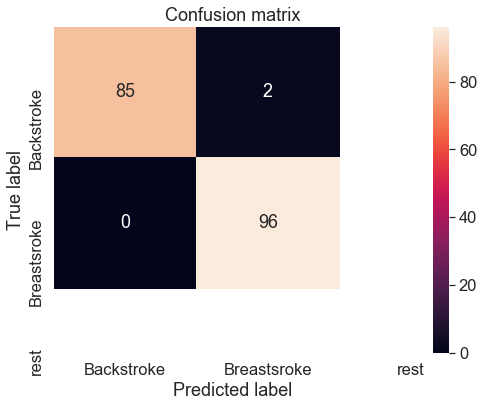

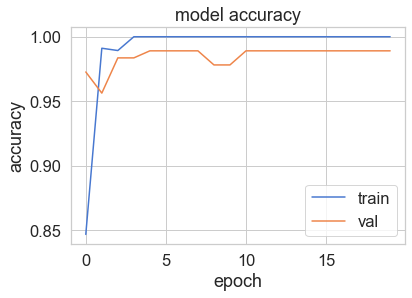

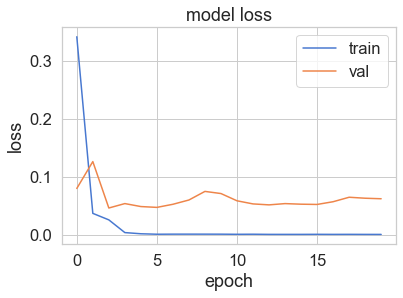

In [19]:
# use LSTM model to predict

y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)
print(y_true_labels)
LABELS = [ 'Backstroke','Breastsroke','rest']

plt.figure(figsize=(8, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
# plt.ylim((16,14))
plt.xlabel('Predicted label')
plt.show();

plt.plot(lstm.history['acc'])
plt.plot(lstm.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

plt.plot(lstm.history['loss'])
plt.plot(lstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [29]:

from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        87
           1       0.98      1.00      0.99        96

    accuracy                           0.99       183
   macro avg       0.99      0.99      0.99       183
weighted avg       0.99      0.99      0.99       183



In [30]:

from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


print(f1_score(y_test, y_pred))

0.9896907216494846


# Save the model into .pb file

In [ ]:
# N_TIME_STEPS = 100 #sliding window length
# STEP = 20 #Sliding window step size
# N_FEATURES = 8


In [73]:
# Save LSTM model

output_node_name = "Dense_2/Softmax"
MODEL_LSTM = str(N_TIME_STEPS)+"_"+str(STEP)+"_"+str(N_FEATURES)+"_"+str(N_CLASSES)+"_new"

tf.train.write_graph(K.get_session().graph_def, './models/LSTM/', \
        MODEL_LSTM + '_graph.pbtxt')
saver = tf.train.Saver()
saver.save(K.get_session(), './models/LSTM/' + MODEL_LSTM + '.chkp')

freeze_graph.freeze_graph('./models/LSTM/' +MODEL_LSTM+ '_graph.pbtxt', None, \
    False, './models/LSTM/' + MODEL_LSTM+ '.chkp', output_node_name, \
    "save/restore_all", "save/Const:0", \
    './models/LSTM/' +MODEL_LSTM + '.pb', True, "")



INFO:tensorflow:Restoring parameters from ./models/LSTM/240_40_6_3_new.chkp
INFO:tensorflow:Froze 13 variables.
INFO:tensorflow:Converted 13 variables to const ops.


node {
  name: "keras_learning_phase/input"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_BOOL
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_BOOL
        tensor_shape {
        }
        bool_val: false
      }
    }
  }
}
node {
  name: "keras_learning_phase"
  op: "PlaceholderWithDefault"
  input: "keras_learning_phase/input"
  attr {
    key: "dtype"
    value {
      type: DT_BOOL
    }
  }
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
}
node {
  name: "LSTM_1_input"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: -1
        }
        dim {
          size: 240
        }
        dim {
          size: 6
        }
      }
    }
  }
}
node {
  name: "LSTM_1/kernel"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
  

# CNN Model 

In [ ]:
# from keras.backend import clear_session

# clear_session()
# # CNN model

# model = Sequential()

# model.add(Conv2D(N_HIDDEN_UNITS * 3, kernel_size = 3, input_shape = (X_train.shape[1], X_train.shape[2], 1), padding = 'same',
#                  activation = 'relu', name="Conv2D_Layer1"))
# model.add(Conv2D(N_HIDDEN_UNITS * 2, kernel_size = 3, padding = 'same', activation = 'relu', name="Conv2D_Layer2"))
# model.add(Conv2D(N_HIDDEN_UNITS, kernel_size = 3, padding = 'same', activation = 'relu', name="Conv2D_Layer3"))
# model.add(Flatten(name="Flatten_Layer"))
# model.add(Dense(N_CLASSES, activation = 'softmax', name="CNN_output"))

# model.summary()

# model.compile(optimizer='Adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# BATCH_SIZE = 24
# N_EPOCHS = 100

# cnn = model.fit(np.expand_dims(X_train, axis=-1), y_train,
#                 batch_size=BATCH_SIZE, epochs=N_EPOCHS,
#                 validation_data=(np.expand_dims(X_test, axis=-1), y_test))

In [ ]:
# model.save("model_har.h5")

In [ ]:
# y_pred_ohe = model.predict(np.expand_dims(X_test, axis=-1))
# y_pred_labels = np.argmax(y_pred_ohe, axis=1)
# y_true_labels = np.argmax(y_test, axis=1)
# confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)

# LABELS = [ 'standing', 'walking']

# plt.figure(figsize=(8, 6))
# sns.set(style='whitegrid', palette='muted', font_scale=1.5)
# sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
# plt.title("CNN Result Confusion Matrix")
# plt.ylabel('True label')
# # plt.ylim((16,14))
# plt.xlabel('Predicted label')
# plt.show();

# plt.plot(cnn.history['acc'])
# plt.plot(cnn.history['val_acc'])
# plt.title('CNN model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='best')
# plt.show()

# plt.plot(cnn.history['loss'])
# plt.plot(cnn.history['val_loss'])
# plt.title('CNN model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='best')
# plt.show()

# Save model to .pb file

In [ ]:
# # Save CNN model
# output_node_name = "CNN_output/Softmax"
# MODEL_NAME = "2020_02_09_CNN"

# tf.train.write_graph(K.get_session().graph_def, './models/CNN/', \
#         MODEL_NAME + '_graph.pbtxt')
# saver = tf.train.Saver()
# saver.save(K.get_session(), './models/CNN/' + MODEL_NAME + '.chkp')

# freeze_graph.freeze_graph('./models/CNN/' + MODEL_NAME + '_graph.pbtxt', None, \
#     False, './models/CNN/' + MODEL_NAME + '.chkp', output_node_name, \
#     "save/restore_all", "save/Const:0", \
#     './models/CNN/' + MODEL_NAME + '.pb', True, "")

# Convert .pb to tflite

In [ ]:
# import tensorflow as tf
# # model_dir='./models/CNN/2020_02_09_CNN.pb'
# model_dir='model_har.h5'

# input_arrays = ['Conv2D_Layer1_input']
# output_arrays = ['CNN_output/Softmax']

# tfc = tf.lite.TFLiteConverter.from_keras_model_file(model_dir)
# # converter =  tfc.from_keras_model_file(model_dir, input_arrays, output_arrays)

# tflite_model = tfc.convert()
# open("CNN_model.tflite","wb").write(tflite_model)

# Make sure the model output and input name

In [ ]:
# import tensorflow as tf
# gf = tf.GraphDef()   
# m_file = open(r"D:\Human Activity Recognition\Training\models\LSTM\100_12_walk_stand.pb",'rb')
# gf.ParseFromString(m_file.read())

# with open('somefile.txt', 'a') as the_file:
#     for n in gf.node:
#         the_file.write(n.name+'\n')

# file = open('somefile.txt','r')
# data = file.readlines()
# print ("output name = ")
# print (data[len(data)-1])

# print ("Input name = ")
# file.seek ( 0 )
# print (file.readline())